<font color = "#CC3D3D"><p>
# Transaction Data based Clustering

- **군집분석이란?**
  - 주어진 데이터를 특성(feature)에 따라 유사한 것끼리 여러 그룹(군집)으로 나누어 각각의 유형별 차이점 분석하는 기법
  - 군집의 개수, 내용, 구조가 파악되지 않은 상태에서 특징을 파악하며, 군집들 간의 관계를 분석 (탐색적 분석)
  - 고객의 세분화 또는 군집 별로 추가적인 분석을 수행하기 위해 활용
- **활용 예시**
  - 고객들을 군집화하여 VIP 고객군과 일반 고객군 간에 어떤 차이점이 있는지 파악
  - 일반 고객들 중에서 VIP 고객 그룹에 더 가까운 고객을 대상으로 교차판매 마케팅 전략을 전개할 수 있음
  - 전체 매장 또는 가맹점 가운데 유사한 성향을 보이는 매장끼리 군집화하여 차별화된 관리 가능
- **군집분석의 평가**
  - 군집의 설명 가능성
  - 군집의 분리
  - 군집의 안정성
- **대표적인 알고리즘**
  - K-means
  - DBSCAN
  - Gaussian Mixture Mode

rfm 고객군을 나눔.
champion은 이상적인 고객 집단. loyal customer는 가장 이상적인 집단
즉 점점 이상적인 집단으로 이동할 수있도록하는 정책? 대안을...
과제...

■ **군집분석을 이용한 고객세분화**  
<img align='left' src='http://drive.google.com/uc?export=view&id=1jJEG8g3kqjQvb2vKHFw9qCY0vxKh2NWL' width=800 height=600>

<img align='left' src="https://t1.daumcdn.net/cfile/tistory/22446C4E57FE2FC611" width=700 height=500>

1.임의의 점을 선택함. 점들중에 선택된 임의의 점기준으로 가까운기준으로 군집을 나눔
2.군집의 평균을 내어 중간점을 생성함. 이를 반복.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import gc  # garbage collection -메모리를 보다 효율적으로 할 수 있음.
from sklearn.cluster import KMeans  # k-means 군집분석
from sklearn.metrics import silhouette_score  # 군집분석 평가를 위한 silhouette 값 계산

pd.set_option('max_columns', 20, 'max_rows', 20)

In [2]:
#matplotlib 한글깨짐 지원
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)    

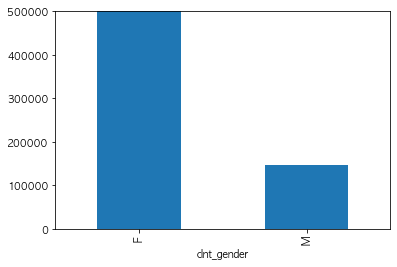

In [13]:
cs = pd.read_csv('L사_고객정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

df = pd.merge(cs, tr)
df = df.groupby('clnt_gender')['buy_ct'].sum()
df.plot.bar()
plt.ylim(0,500000)
plt.show()

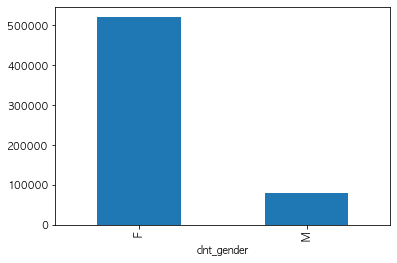

In [15]:
cs = pd.read_csv('L사_고객정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

df = pd.merge(cs, tr)
df = df.groupby('clnt_gender')['buy_ct'].count()
df.plot.bar()
plt.show()

### Data Collection
*출처 : 롯데멤버스, L.pay|L.POINT, 제6회 L.POINT Big Data Competition*

In [5]:
cs = pd.read_csv('L사_고객정보.csv')
# 극단적으로 구매액이 높은 고객이 있어 분석에서 제외.
cs = cs.drop(50578) #50578은 ID가 아니라 인덱스. --> 이상치는 분석시 제거.

gd = pd.read_csv('L사_상품정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

gd.pd_c = gd.pd_c.astype(str).str.zfill(4)
# 상품과 거래 데이터의 pd_c 컬럼의 데이터 유형이 서로 달라 맞춰줌. 자리수까지도 맞춰줘야 함.
# 예를 들어 0050와 50은 같지 않기 떄문에 merge가 불가능함.

df = pd.merge(tr, cs).merge(gd, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64') # 날짜정보를 담고 있는 de_dt 컬럼의 데이터 유형이 정수이기 때문

# 필요없는 데이터 삭제 & 가비지 컬렉션 통한 메모리 관리
del gd, tr
gc.collect()

df.head()

# 업종단위 (biz_unit): 온라인 업종 (A01 / A02 / A03), 오프라인 업종 (B01 / B02 / B03)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups


### Data Cleansing

In [6]:
# 구매금액이나 구매건수 컬럼이 잘못되어 있는 비율
print(df.query('buy_am == 0 or  buy_ct == 0').shape[0]) # 6770건의 데이터.
#환불하여 0이 되었는지, 확인

# case-1
print(df.query('buy_am != 0 and buy_ct == 0').shape[0])
#구매금액은 0이 아닌데 구매건수는 0인 경우.

# case-2
print(df.query('buy_am == 0 and buy_ct != 0').shape[0])
#구매금액은 0인데 구매 건수는 1이 아닌경우.

# case-3
print(df.query('buy_am == 0 and buy_ct == 0').shape[0])
#둘다 0인 경우
 

6770
6244
83
443


#데이터 전처리#
둘다 0인 경우에는 데이터를 아예 삭제,
카운트가 있어 구매한 상품에 대한 정보가 있다면 해당 상품 넣음.

In [7]:
# 해결책
# case-1 : buy_ct를 1로 설정 
df['buy_ct'] = np.where(df.buy_ct == 0, 1, df.buy_ct)
# case-2, case-3: 해당 레코드 삭제
df = df.query('buy_am != 0')

In [8]:
# 데이터 요약
print('=======  분석 데이터 요약  =======')
print('▶ 고객수:', df.clnt_id.nunique())
print(f'▶ 상품수: 대분류({df.clac_nm1.nunique()}), 중분류({df.clac_nm2.nunique()}), 소분류({df.clac_nm3.nunique()})')
print('▶ 업종수:', df.biz_unit.nunique())
print(f'▶ 기간: {df.de_dt.min()} ~ {df.de_dt.max()} ({(df.de_dt.max()-df.de_dt.min()).days+1}일)')

=======  분석 데이터 요약  =======
▶ 고객수: 11265
▶ 상품수: 대분류(59), 중분류(331), 소분류(1655)
▶ 업종수: 6
▶ 기간: 2019-07-01 00:00:00 ~ 2019-09-30 00:00:00 (92일)


In [2]:
0/1

0.0

로그 정보를 사용해서 보다 디테일한 분석 가능.

### Feature Generation

*새로 만든 feature와 병합할 고객ID로만 이루어진 데이터프레임을 만든다.*

In [9]:
features = pd.DataFrame({'clnt_id': df.clnt_id.unique()})
features

,clnt_id
0,21922
1,39423
2,18362
3,48969
4,18478
...,...
11260,15146
11261,53632
11262,58443
11263,21232


inner join 이 아닌 left join을 해야 모든 데이터 사용 가능.

**[Feature 1-4]** 총구매액, 구매건수, 평균구매액, 최대구매액

In [10]:
f = df.groupby('clnt_id')['buy_am'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()
#np.mean을 사용해서 평균을 사용할 수 있는데 소수점 까지 출력되기 때문에 lambda를 사용함.

features = features.merge(f, how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액
0,21922,79980,13,6152,13900
1,39423,676262,134,5047,55600
2,18362,802720,117,6861,55600
3,48969,388898,100,3889,25800
4,18478,1998300,32,62447,711000
...,...,...,...,...,...
11260,15146,52800,1,52800,52800
11261,53632,77040,1,77040,77040
11262,58443,568000,1,568000,568000
11263,21232,362500,1,362500,362500


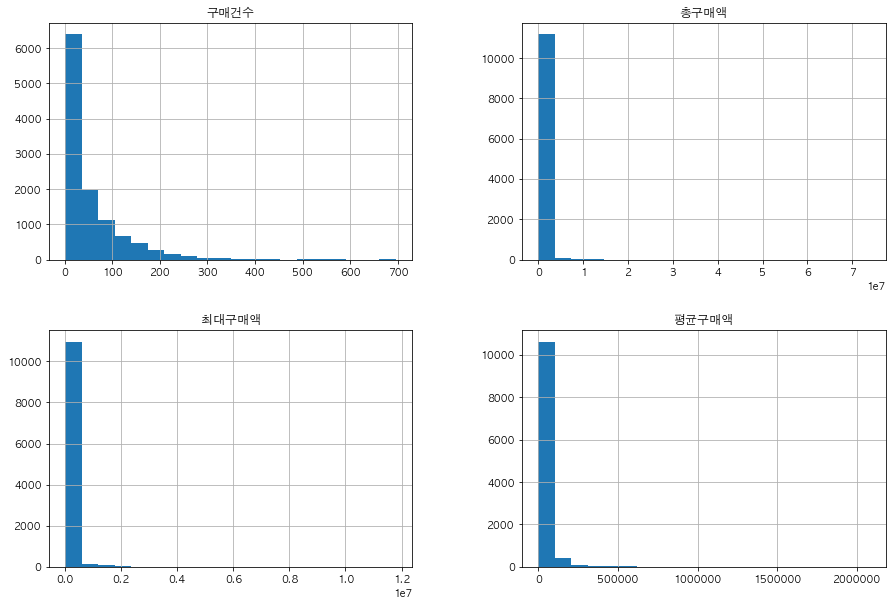

In [11]:
# histogram
f.iloc[:,1:].hist(bins=20, figsize=(15,10))
plt.show()

**[Feature 5-7]** 구매상품수(대/중/소분류 각각)

In [15]:
# multi index -> single index
def drop_column_level(data):
    c_list = []
    for _, c in data.columns:
        if not c:
            c_list.append(_)
        else:
            c_list.append(c)
    return c_list

In [13]:
f = df.groupby('clnt_id').agg({
    'clac_nm3': [('구매상품수(소)', lambda x: x.nunique())],
    'clac_nm2': [('구매상품수(중)', lambda x: x.nunique())],
    'clac_nm1': [('구매상품수(대)', lambda x: x.nunique())]
}).reset_index()
f.columns = drop_column_level(f)
features = features.merge(f, how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매상품수(소),구매상품수(중),구매상품수(대)
0,21922,79980,13,6152,13900,12,9,7
1,39423,676262,134,5047,55600,62,43,20
2,18362,802720,117,6861,55600,60,38,18
3,48969,388898,100,3889,25800,65,43,17
4,18478,1998300,32,62447,711000,21,16,13
...,...,...,...,...,...,...,...,...
11260,15146,52800,1,52800,52800,1,1,1
11261,53632,77040,1,77040,77040,1,1,1
11262,58443,568000,1,568000,568000,1,1,1
11263,21232,362500,1,362500,362500,1,1,1


In [14]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11265 entries, 0 to 11264
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   clnt_id   11265 non-null  int64
 1   구매상품수(소)  11265 non-null  int64
 2   구매상품수(중)  11265 non-null  int64
 3   구매상품수(대)  11265 non-null  int64
dtypes: int64(4)
memory usage: 352.2 KB


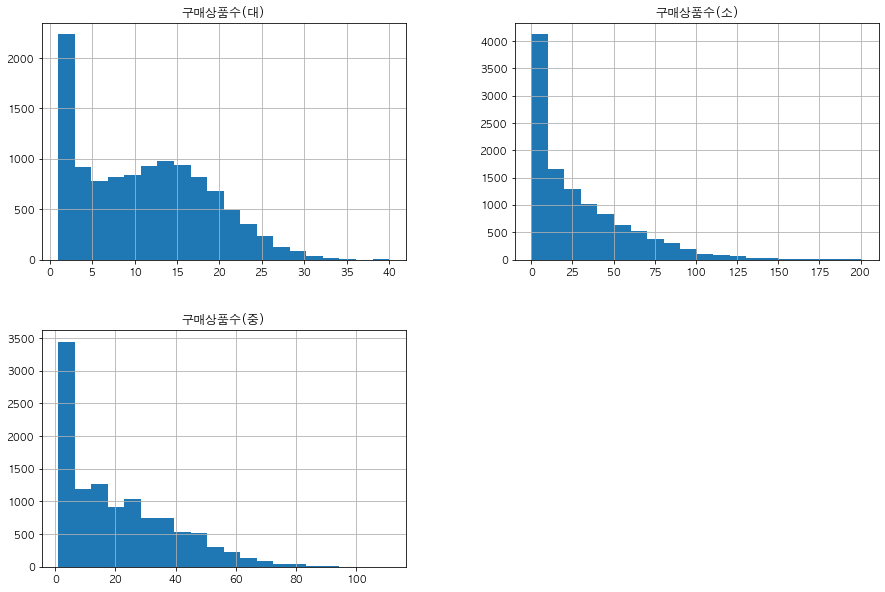

In [16]:
# histogram
f.iloc[:,1:].hist(bins=20, figsize=(15,10))
plt.show()

**[Feature 8-10]** 내점일수, 구매주기, 주말방문율

In [28]:
f = df.groupby('clnt_id')['de_dt'].agg([
    ('내점일수',lambda x: x.nunique()),
    ('구매주기', lambda x: int(((x.max() - x.min()).days) / x.nunique())),
    ('주말방문율', lambda x: (x.dt.weekday > 4).mean().round(2))
]).reset_index()
features = features.merge(f, how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매상품수(소),구매상품수(중),구매상품수(대),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수
0,21922,79980,13,6152,13900,12,9,7,5,16,0.00,13330.0,2.2
1,39423,676262,134,5047,55600,62,43,20,19,4,0.09,29403.0,5.8
2,18362,802720,117,6861,55600,60,38,18,20,4,0.00,36487.0,5.3
3,48969,388898,100,3889,25800,65,43,17,10,8,0.00,32408.0,8.3
4,18478,1998300,32,62447,711000,21,16,13,12,6,0.03,117547.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,15146,52800,1,52800,52800,1,1,1,1,0,0.00,52800.0,1.0
11261,53632,77040,1,77040,77040,1,1,1,1,0,0.00,77040.0,1.0
11262,58443,568000,1,568000,568000,1,1,1,1,0,0.00,568000.0,1.0
11263,21232,362500,1,362500,362500,1,1,1,1,0,0.00,362500.0,1.0


/Users/seongyoon/programming/program/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


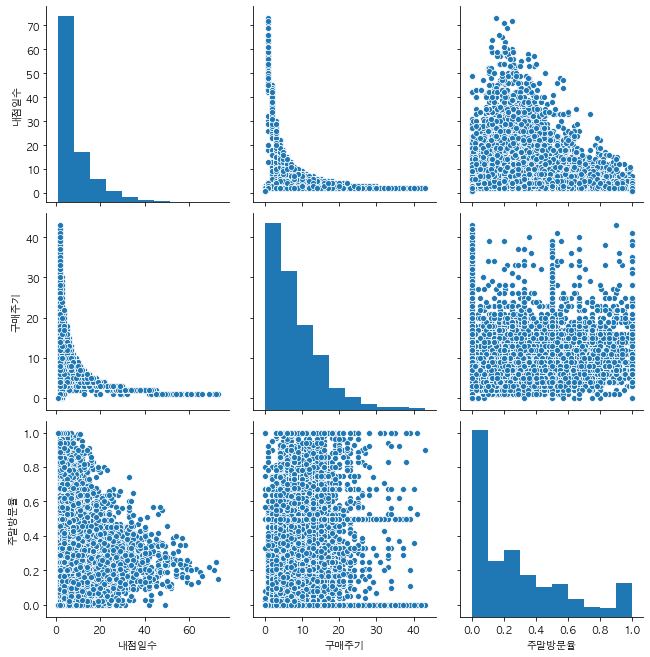

In [29]:
sns.pairplot(data=f.iloc[:,1:], size=3)
plt.show()
#원하는 데이터 프레임을 넣어 3개 변수 간의 관계를 보여줌.

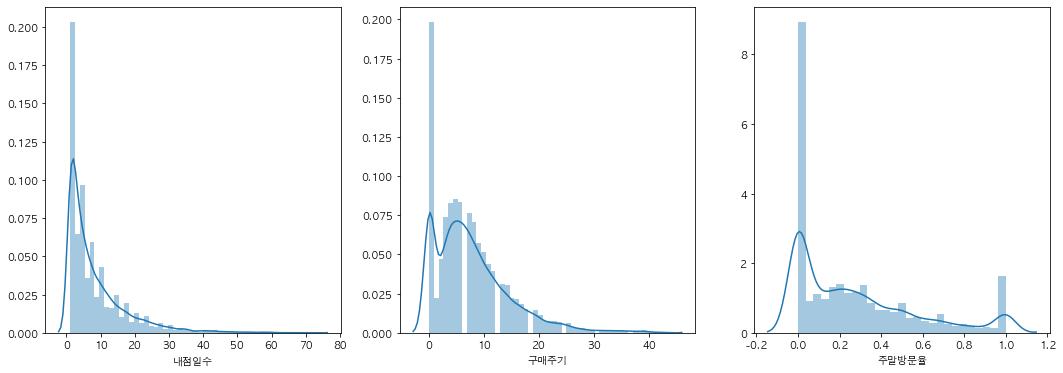

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))


sns.distplot(f.내점일수, ax=ax[0])
sns.distplot(f.구매주기, ax=ax[1])
sns.distplot(f.주말방문율, ax=ax[2])
plt.show()

#figure가 모여서 하나의 subplot이 되는 것.
#1 by3열 3열.

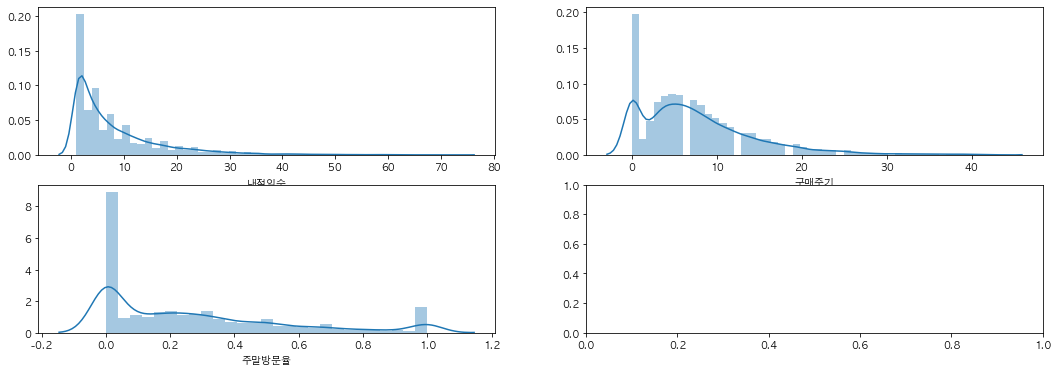

In [31]:
fig, ax = plt.subplots(2,2, figsize=(18,6))

sns.distplot(f.내점일수, ax=ax[0,0])
sns.distplot(f.구매주기, ax=ax[0,1])
sns.distplot(f.주말방문율, ax=ax[1,0])
plt.show()

**[Feature 11-12]** 거래 당 평균 구매액, 구매건수

In [20]:
visit_cnt = df.groupby('clnt_id')['trans_id'].agg(lambda x: x.nunique())
per_amount = (df.groupby('clnt_id')['buy_am'].sum() / visit_cnt).round(0).reset_index().rename(columns={0:'거래당구매액'})
per_count = (df.groupby('clnt_id')['buy_am'].count() / visit_cnt).round(1).reset_index().rename(columns={0:'거래당구매건수'})
f = pd.merge(per_amount, per_count, on='clnt_id')
features = features.merge(f, how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매상품수(소),구매상품수(중),구매상품수(대),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수
0,21922,79980,13,6152,13900,12,9,7,5,16,0.00,13330.0,2.2
1,39423,676262,134,5047,55600,62,43,20,19,4,0.09,29403.0,5.8
2,18362,802720,117,6861,55600,60,38,18,20,4,0.00,36487.0,5.3
3,48969,388898,100,3889,25800,65,43,17,10,8,0.00,32408.0,8.3
4,18478,1998300,32,62447,711000,21,16,13,12,6,0.03,117547.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,15146,52800,1,52800,52800,1,1,1,1,0,0.00,52800.0,1.0
11261,53632,77040,1,77040,77040,1,1,1,1,0,0.00,77040.0,1.0
11262,58443,568000,1,568000,568000,1,1,1,1,0,0.00,568000.0,1.0
11263,21232,362500,1,362500,362500,1,1,1,1,0,0.00,362500.0,1.0


**[Feature 13]** 구매추세 패턴

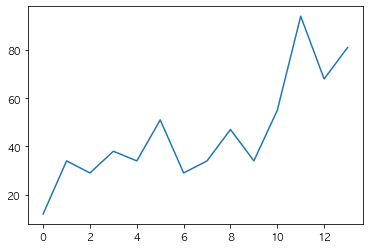

(4.325274725274726, 17.600000000000005)

In [21]:
# 데이터로부터 추세선을 찾는 방법
data = [12, 34, 29, 38, 34, 51, 29, 34, 47, 34, 55, 94, 68, 81]
plt.plot(data)
plt.show()

x = np.arange(len(data))
y = np.array(data)
z = np.polyfit(x, y, 1)
z[0], z[1]

#증가하는 추세.


In [ ]:
#기울기를 찾아 추세를 찾자.. 이를 하나의 열에 추가.

In [18]:
# 마지막주부터 10주전까지 (총 10주 간) 매주 구매건수를 계산하여 리스트에 넣음
week_to = df.de_dt.max()
week_trans = []
for i in range(10):
    week_from = week_to + pd.DateOffset(weeks=-1)
    week_trans.append(df.query('@week_from < de_dt <= @week_to')
                      .groupby('clnt_id')['trans_id']
                      .agg([(f'w{10-i}', 'count')])
                      .reset_index())
    week_to = week_from

# 리스트로부터 데이터프레임 변환    
f = pd.DataFrame({'clnt_id': df.clnt_id.unique()})
for w in week_trans[::-1]:
    f = pd.merge(f, w, how='left')
f = f.fillna(0)

# 각 고객별로 10주간 구매에 대한 추세선(ax+b)을 계산하여 기울기(a)를 해당 고객의 추세패턴으로 사용 
# 기울기가 양수면 시간이 지나면서 구매가 증가한다는 뜻. 음수면 반대.
f['구매추세'] = f.apply(lambda x: np.polyfit(range(10), x[1:], 1)[0].round(2), axis=1)
features = features.merge(f.iloc[:,[0,-1]], how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매상품수(소),구매상품수(중),구매상품수(대),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세
0,21922,79980,13,6152,13900,12,9,7,5,16,0.00,13330.0,2.2,0.27
1,39423,676262,134,5047,55600,62,43,20,19,4,0.09,29403.0,5.8,0.32
2,18362,802720,117,6861,55600,60,38,18,20,4,0.00,36487.0,5.3,0.22
3,48969,388898,100,3889,25800,65,43,17,10,8,0.00,32408.0,8.3,0.16
4,18478,1998300,32,62447,711000,21,16,13,12,6,0.03,117547.0,1.9,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,15146,52800,1,52800,52800,1,1,1,1,0,0.00,52800.0,1.0,-0.04
11261,53632,77040,1,77040,77040,1,1,1,1,0,0.00,77040.0,1.0,-0.02
11262,58443,568000,1,568000,568000,1,1,1,1,0,0.00,568000.0,1.0,0.04
11263,21232,362500,1,362500,362500,1,1,1,1,0,0.00,362500.0,1.0,0.04


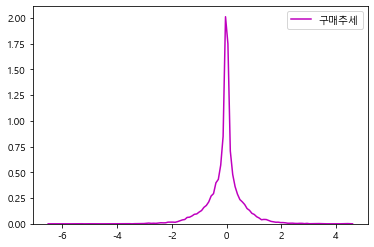

In [19]:
sns.kdeplot(f.구매추세, color='m') #분포를 보여주는 그래프.
plt.show()

**[Feature 14]** 주구매시간

In [20]:
f = df.groupby('clnt_id')['de_tm'].agg([
    ('주구매시간', lambda x: int(x.str[:2].value_counts().index[0]))
]).reset_index()
features = features.merge(f, how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매상품수(소),구매상품수(중),구매상품수(대),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세,주구매시간
0,21922,79980,13,6152,13900,12,9,7,5,16,0.00,13330.0,2.2,0.27,21
1,39423,676262,134,5047,55600,62,43,20,19,4,0.09,29403.0,5.8,0.32,15
2,18362,802720,117,6861,55600,60,38,18,20,4,0.00,36487.0,5.3,0.22,10
3,48969,388898,100,3889,25800,65,43,17,10,8,0.00,32408.0,8.3,0.16,10
4,18478,1998300,32,62447,711000,21,16,13,12,6,0.03,117547.0,1.9,-0.27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,15146,52800,1,52800,52800,1,1,1,1,0,0.00,52800.0,1.0,-0.04,10
11261,53632,77040,1,77040,77040,1,1,1,1,0,0.00,77040.0,1.0,-0.02,10
11262,58443,568000,1,568000,568000,1,1,1,1,0,0.00,568000.0,1.0,0.04,10
11263,21232,362500,1,362500,362500,1,1,1,1,0,0.00,362500.0,1.0,0.04,1


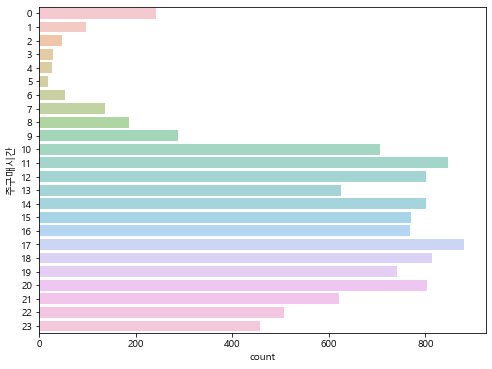

In [21]:
# 범주형 속성 값의 빈도 출력
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y='주구매시간', data=f, alpha=0.5)  

**[Feature 15]** 가격선호도 (고가상품구매율)

In [22]:
# 판매단가 계산
df['price'] = df['buy_am'] / df['buy_ct']

# 상품별 평균 판매단가에 대한 4분위수 계산 => 3Q 이상을 고가상품으로 설정
price_4q = df.groupby('pd_c')['price'].mean().quantile([.25,.5,.75]) # 분위수로 나눔.
price_4q

#분위수를 통해서 단가에 따른 제품군을 나눔.

0.25     4524.444444
0.50     9162.007797
0.75    25777.266788
Name: price, dtype: float64

In [23]:
f = (df.groupby('clnt_id')['price']
     .agg([('고가상품구매율', lambda x: (x > price_4q.iloc[2]).mean().round(2))])
     .reset_index())
features = features.merge(f, how='left'); features

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매상품수(소),구매상품수(중),구매상품수(대),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세,주구매시간,고가상품구매율
0,21922,79980,13,6152,13900,12,9,7,5,16,0.00,13330.0,2.2,0.27,21,0.00
1,39423,676262,134,5047,55600,62,43,20,19,4,0.09,29403.0,5.8,0.32,15,0.01
2,18362,802720,117,6861,55600,60,38,18,20,4,0.00,36487.0,5.3,0.22,10,0.00
3,48969,388898,100,3889,25800,65,43,17,10,8,0.00,32408.0,8.3,0.16,10,0.00
4,18478,1998300,32,62447,711000,21,16,13,12,6,0.03,117547.0,1.9,-0.27,10,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,15146,52800,1,52800,52800,1,1,1,1,0,0.00,52800.0,1.0,-0.04,10,1.00
11261,53632,77040,1,77040,77040,1,1,1,1,0,0.00,77040.0,1.0,-0.02,10,1.00
11262,58443,568000,1,568000,568000,1,1,1,1,0,0.00,568000.0,1.0,0.04,10,1.00
11263,21232,362500,1,362500,362500,1,1,1,1,0,0.00,362500.0,1.0,0.04,1,1.00


### Feature Selection

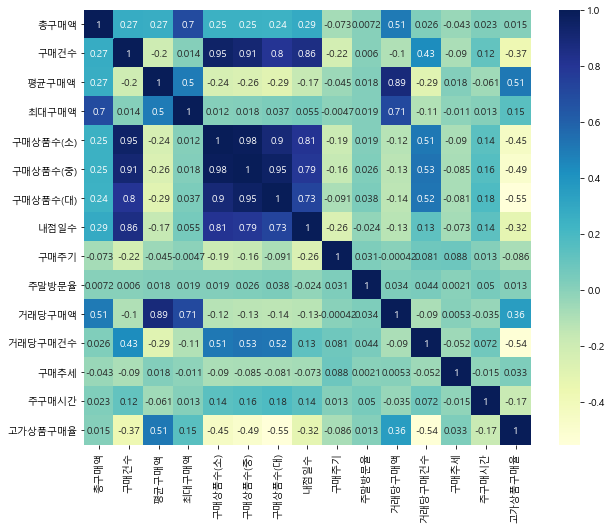

In [24]:
# 상관계수(-1 ~ +1)를 통해 feature 간의 유사성을 파악 
plt.figure(figsize=(10,8))
sns.heatmap(features.iloc[:,1:].corr(), annot=True, cmap="YlGnBu")
plt.show()

#상관관계를 heatmap을 통해서

In [ ]:
# 양의 상관관계가 매우 높음.
sns.lmplot(x='구매건수', y='구매상품수(소)', data=features, 
           line_kws={'color':"green"}, scatter_kws={'edgecolor':"white"})
plt.show()

#lmplot 산점도와 회귀선을 그려줌.

In [ ]:
# 음의 상관관계가 있으나 유의하지 않음.
sns.lmplot(x='총구매액', y='구매주기', data=features, 
           line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"})
plt.show()

In [33]:
# 상관관계가 높은 (서로 유사한) feature를 제거
features = features.drop(columns=['구매건수', '구매상품수(소)', '구매상품수(대)', '거래당구매액'])
features

,clnt_id,총구매액,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매건수
0,21922,79980,6152,13900,9,5,16,0.00,2.2
1,39423,676262,5047,55600,43,19,4,0.09,5.8
2,18362,802720,6861,55600,38,20,4,0.00,5.3
3,48969,388898,3889,25800,43,10,8,0.00,8.3
4,18478,1998300,62447,711000,16,12,6,0.03,1.9
...,...,...,...,...,...,...,...,...,...
11260,15146,52800,52800,52800,1,1,0,0.00,1.0
11261,53632,77040,77040,77040,1,1,0,0.00,1.0
11262,58443,568000,568000,568000,1,1,0,0.00,1.0
11263,21232,362500,362500,362500,1,1,0,0.00,1.0


In [34]:
features.to_csv('features.csv', index=False, encoding='cp949')
#pickle

In [35]:
# Pandas Profiling To Boost Exploratory Data Analysis
# - Install: !pip install pandas-profiling
# - Usage:
# import pandas_profiling as pp
# pp.ProfileReport(data)

#칼럼 별로 매우 상세한 정보를 보여줌. 결측값, 데이터 등.

### Cluster Analysis

*데이터 표준화(또는 정규화)*

In [36]:
X = features.iloc[:,1:].apply(lambda x: (x - x.mean()) / x.std(), axis=1) 
X

,총구매액,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매건수
0,2.434628,-0.229348,0.050227,-0.451009,-0.451153,-0.450757,-0.451334,-0.451254
1,2.466695,-0.367702,-0.154227,-0.388832,-0.388934,-0.388997,-0.389014,-0.388990
2,2.469104,-0.360093,-0.186831,-0.384349,-0.384413,-0.384469,-0.384484,-0.384465
3,2.469593,-0.355457,-0.194682,-0.383677,-0.383919,-0.383934,-0.383993,-0.383932
4,2.322055,-0.399269,0.512434,-0.487031,-0.487037,-0.487045,-0.487054,-0.487051
...,...,...,...,...,...,...,...,...
11260,1.207615,1.207615,1.207615,-0.724554,-0.724554,-0.724591,-0.724591,-0.724554
11261,1.207615,1.207615,1.207615,-0.724559,-0.724559,-0.724584,-0.724584,-0.724559
11262,1.207615,1.207615,1.207615,-0.724567,-0.724567,-0.724571,-0.724571,-0.724567
11263,1.207615,1.207615,1.207615,-0.724567,-0.724567,-0.724572,-0.724572,-0.724567


In [40]:
KMeans(n_clusters = 4, random_state = 0).fit(X)
#고객 데이터를 기준으로 데이터를 군집화함.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

*최적 군집 수(K) 도출: Elbow method + Silhouette method*

<img align='left' src='http://drive.google.com/uc?export=view&id=1tTJ5HF0eXqjdz5mXMRg0wRKPx27D3mUX' width=500 height=400>

In [41]:
# 군집 수에 따른 SSE(군집내 오차제곱합)와 Silhouette score(군집간 분리도 - 군집내 응집도) 계산

wss = []
sis = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wss = np.append(wss, kmeans.inertia_)
    sis = np.append(sis, silhouette_score(X, kmeans.labels_))

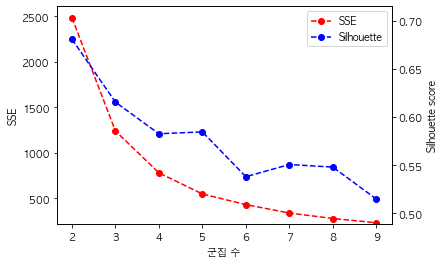

In [42]:
# 군집 수에 따른 SSE와 Silhouette score 시각화
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(np.arange(2,10), wss, 'ro--', label='SSE')
line2 = ax2.plot(np.arange(2,10), sis, 'bo--', label='Silhouette') 

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05)
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05) #값의 최대치를 정함. 

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()

#지표상으로 몇개의 군집으로 나눠야하는 지를 확읺마.
# sse = 군집내 오차제곱합.
# scale이 두개일때에 y축이 2개가 필요함.

*군집분석을 통한 고객 세분화*

In [43]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
features['세그먼트'] = kmeans.labels_
features

,clnt_id,총구매액,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매건수,구매추세,주구매시간,고가상품구매율,세그먼트
0,21922,79980,6152,13900,9,5,16,0.00,2.2,0.27,21,0.00,3
1,39423,676262,5047,55600,43,19,4,0.09,5.8,0.32,15,0.01,3
2,18362,802720,6861,55600,38,20,4,0.00,5.3,0.22,10,0.00,3
3,48969,388898,3889,25800,43,10,8,0.00,8.3,0.16,10,0.00,3
4,18478,1998300,62447,711000,16,12,6,0.03,1.9,-0.27,10,0.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,15146,52800,52800,52800,1,1,0,0.00,1.0,-0.04,10,1.00,2
11261,53632,77040,77040,77040,1,1,0,0.00,1.0,-0.02,10,1.00,2
11262,58443,568000,568000,568000,1,1,0,0.00,1.0,0.04,10,1.00,2
11263,21232,362500,362500,362500,1,1,0,0.00,1.0,0.04,1,1.00,2


In [44]:
%pip install yellowbrick

     |████████████████████████████████| 263 kB 148 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


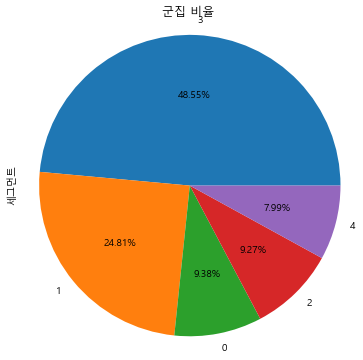

In [35]:
plt.figure(figsize=(6,6))
features.세그먼트.value_counts().plot.pie(autopct='%.2f%%')
plt.title("군집 비율")
plt.axis('equal')
plt.show()

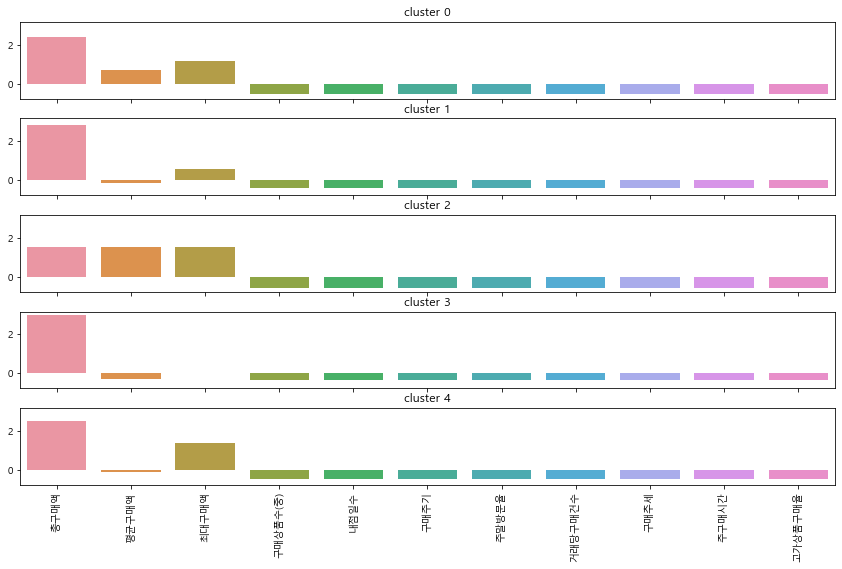

In [36]:
fig, ax = plt.subplots(5, 1, figsize=(12,7), sharex=True, sharey=True)
ax = ax.ravel()
plt.tight_layout() # 자동으로 레이아웃 조정
#plt.subplots_adjust(hspace=0.2) # subplot간의 너비 간격 조절

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
#    ax[i].bar(np.arange(X.columns.size), kmeans.cluster_centers_[i])
    sns.barplot(np.arange(X.columns.size), kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(X.columns.size))
    ax[i].set_xticklabels(X.columns, rotation=90)

<font color = "#CC3D3D"><p>
# End